In [17]:
# Import TensorFlow and hub
import tensorflow as tf
import tensorflow_hub as hub

# Plotting
import matplotlib.pyplot as plt

# some important packages
import numpy as np
import pandas as pd
import pickle

# scikit-learn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [18]:
pip install --upgrade tensorflow-hub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import tensorflow_hub as hub

model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)
print('Model Loaded')



Model Loaded


In [20]:
def embed(texts):
    return model(texts)
    

In [21]:
embed(['Nice Tourist Place'])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[-3.35077606e-02,  5.63890487e-02, -1.90463401e-02,
        -2.26686653e-02,  6.76754788e-02,  4.34877872e-02,
         3.63436937e-02, -1.21467765e-02,  1.03509622e-02,
        -6.91045895e-02,  6.33410597e-03, -3.36765535e-02,
        -5.57766557e-02,  4.09523621e-02,  3.72058451e-02,
        -4.59176935e-02, -2.71378178e-02,  9.14950215e-04,
        -3.49748023e-02, -5.10025583e-02,  2.75049843e-02,
        -1.99163854e-02,  1.35804126e-02,  3.41760628e-02,
         1.53656323e-02,  4.74726083e-03, -5.41357584e-02,
        -6.78675696e-02,  6.63973391e-02, -3.24422680e-02,
        -4.48512957e-02, -2.54089455e-03,  4.92414683e-02,
        -2.22172458e-02, -6.30518869e-02,  7.54126832e-02,
        -4.63451184e-02,  5.00843748e-02,  4.10078466e-02,
        -7.22826109e-04, -1.56141296e-02, -3.36850025e-02,
         2.95556169e-02, -4.94616218e-02,  2.28461120e-02,
         5.91024682e-02, -4.10833992e-02,  8.23190610e-04,
      

In [22]:
df = pd.read_excel("Tourist places.xlsx")
df.head()
df = df[["Destination", "description"]]
df.head()

,Destination,description
0,Mawlynnong,"Known as the ""Cleanest Village in Asia,"" famou..."
1,Halebid,Description: Home to ancient Hoysala temples w...
2,Chembra Peak,Description: Popular trekking destination offe...
3,Ziro,Description: A picturesque valley surrounded b...
4,Majuli,Description: World's largest river island loca...


In [23]:
df = df.dropna()
df = df.reset_index()

In [24]:
titles = list(df['description'])

In [25]:
titles[:5]

['Known as the "Cleanest Village in Asia," famous for its cleanliness and community-based eco-tourism initiatives.\n Cleanliness, Eco-tourism, Community-based, Nature, Village',
 'Description: Home to ancient Hoysala temples with intricate carvings and sculptures, showcasing rich architectural heritage. Keywords: Hoysala Temples, Architecture, Sculptures, Heritage, Ancient',
 'Description: Popular trekking destination offering breathtaking views of the Western Ghats and a heart-shaped lake atop the peak.\nKeywords: Trekking, Western Ghats, Scenic Views, Heart-shaped Lake, Adventure',
 'Description: A picturesque valley surrounded by pine-covered hills, known for its lush green landscapes and vibrant tribal culture. Keywords: Valley, Tribal Culture, Lush Green, Hills, Serene',
 "Description: World's largest river island located in the Brahmaputra River, known for its unique Assamese Vaishnavite culture and scenic beauty. Keywords: River Island, Vaishnavite Culture, Brahmaputra, Scenic B

In [26]:
embeddings = embed(titles)
print('The embedding shape is:', embeddings.shape)

The embedding shape is: (43, 512)


In [27]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

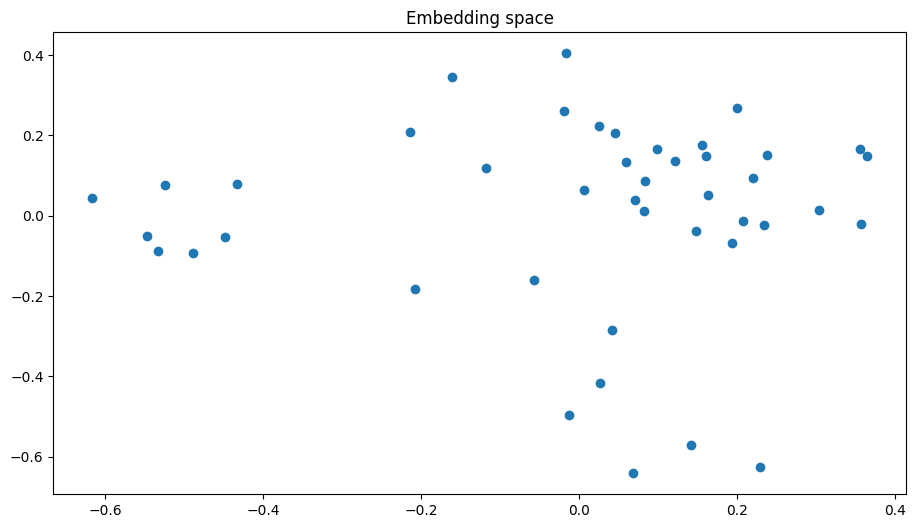

In [28]:
plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [29]:
nn = NearestNeighbors(n_neighbors=10)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=10)

In [30]:
def recommend(text):
    emb = embed([text])
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    return df['Destination'].iloc[neighbors].tolist()

In [31]:
print('Recommended places:')
recommend("spiritual")

Recommended places:


['Hemis',
 'Chembra Peak',
 'Tawang',
 'Zanskar Valley',
 'Chopta',
 'Pachmarhi',
 'Kotagiri',
 'Hogenakkal Falls',
 'Gavi',
 'Kalimpong']

In [32]:
import pickle

with open('nearest_neighbors_model.pkl', 'wb') as file:
    pickle.dump(nn, file)
with open('nearest_neighbors_model.pkl', 'rb') as file:
    nn = pickle.load(file)
        